# <font face = 'Impact' color = '#FFAEBC' > Exploring Associations between Variables <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a comprehensive analysis of variable associations while ensuring key statistical assumptions are met. It begins with an exploratory data analysis, checking for normality, linearity, presence of outliers, and homoscedasticity using visualizations and statistical tests. After verifying assumptions, the notebook applies appropriate correlation techniques such as Pearson, Spearman, and Kendall’s Tau-b, ensuring robust insights into the relationships between variables.

In [12]:
# Import the necessary libraries pandas, numpy, scipy.stats, seaborn, matplotlib.pyplot, qdesc
import pandas as pd
import numpy as np
import qdesc as qd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
# Loading our data set RevGrades.xlsx
df = pd.read_excel("RevGrades.xlsx")
df

,Review,Grades
0,1.93,83.49
1,4.24,85.89
2,2.58,84.92
3,3.92,85.22
4,3.35,84.93
...,...,...
208,2.19,84.26
209,3.35,85.25
210,2.92,85.09
211,2.69,85.26


In [14]:
# Checking out the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  213 non-null    float64
 1   Grades  213 non-null    float64
dtypes: float64(2)
memory usage: 3.5 KB


In [15]:
# Generating Quick Descriptives and AD Statistic
qd.desc(df)

,count,mean,std,median,MAD_raw,MAD_norm,min,max,AD_stat,5% crit_value
Review,213.0,3.04,0.87,3.08,0.56,0.83,1.03,5.11,0.34,0.77
Grades,213.0,85.00,0.96,85.06,0.61,0.90,82.64,87.32,0.38,0.77



--- Variable: Review ---
  Anderson-Darling Statistic : 0.3394
  Critical Value (@ 5.0%) : 0.7730
  Decision : Fail to Reject Null


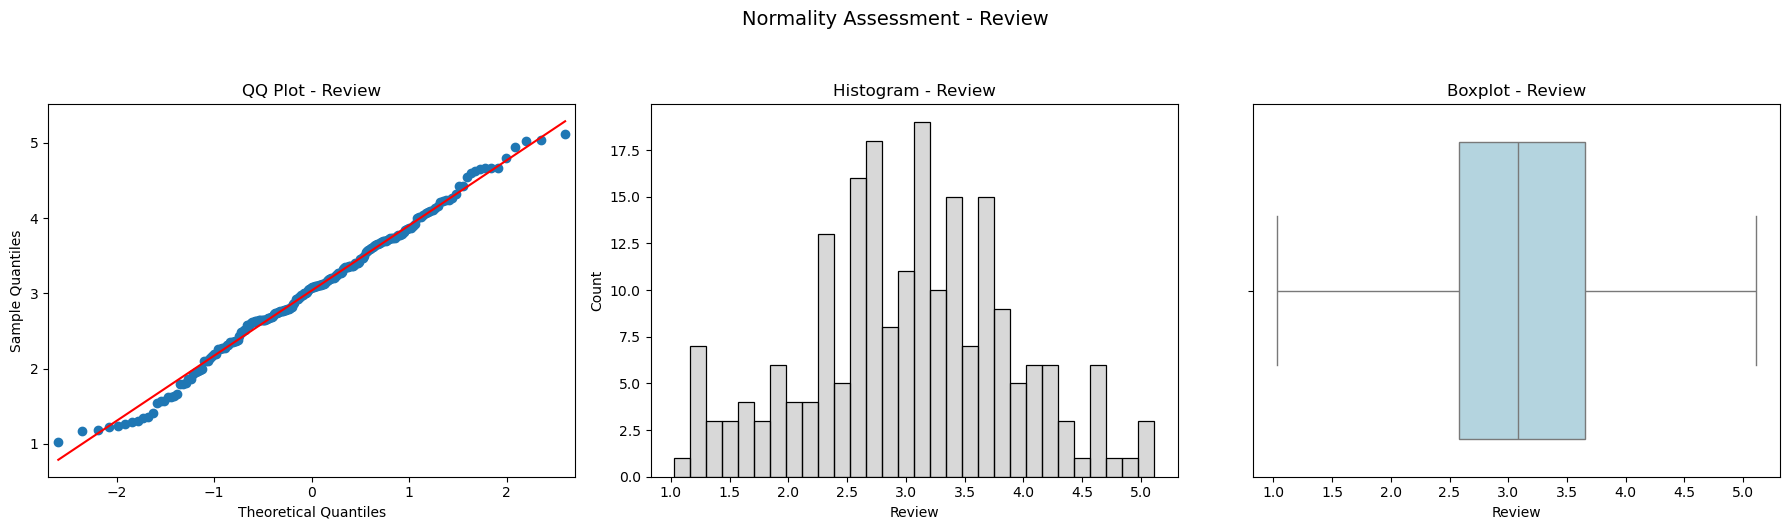


--- Variable: Grades ---
  Anderson-Darling Statistic : 0.3787
  Critical Value (@ 5.0%) : 0.7730
  Decision : Fail to Reject Null


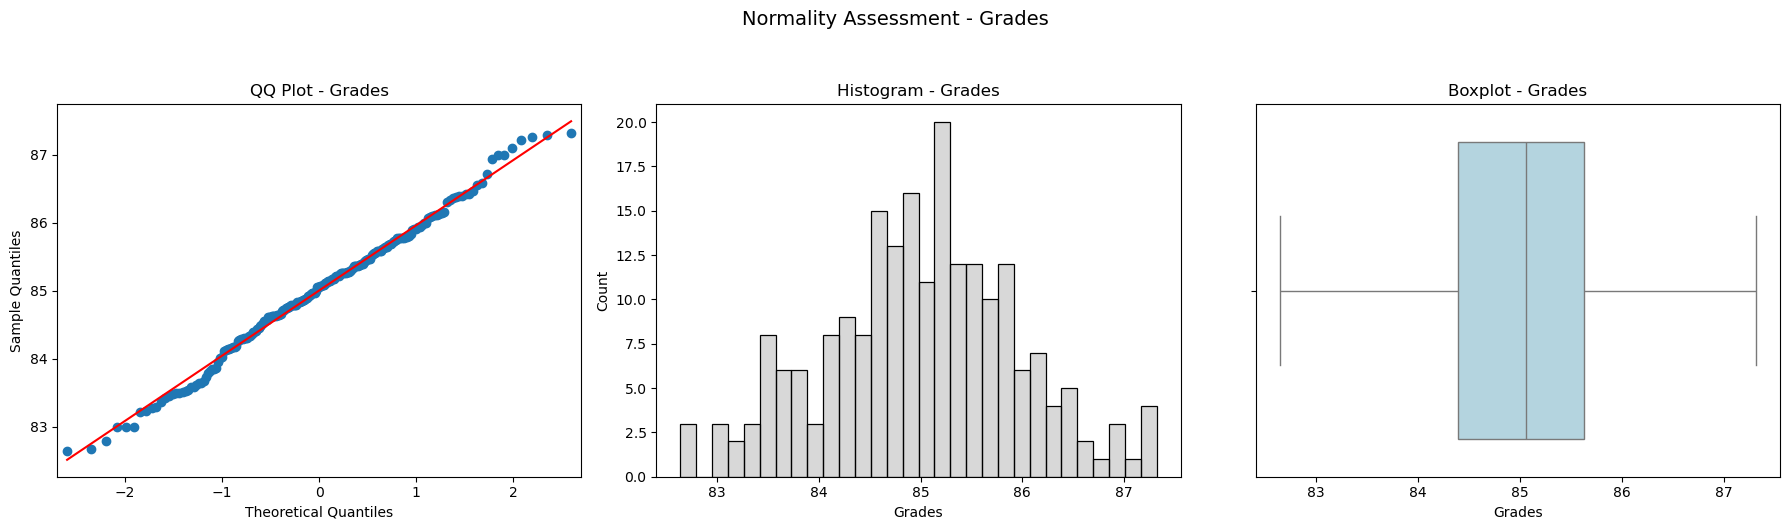

In [16]:
# Doing a normality check using AD-test and Data Visualizations
qd.normcheck_dashboard(df)

In [17]:
# Correlating Customer_Count and Daily_Sales
# Using Pearson Correlation since the variables are normally distributed.
pearson_corr, pearson_p = stats.pearsonr(df['Review'], df['Grades'])
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Pearson correlation coefficient: 0.8101, p-value: 0.0000


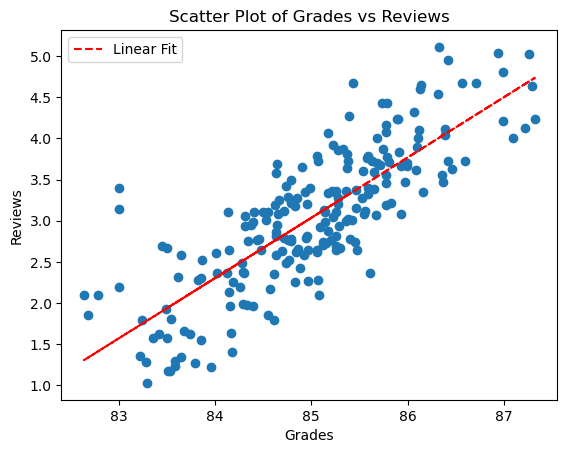

In [18]:

# Checking the linearity assumption of the variables using a scatter plot.
# Select the variables
grades = df['Grades']
reviews = df['Review']

# Create a scatter plot
plt.scatter(grades, reviews)

# Add a regression line (optional)
z = np.polyfit(grades, reviews, 1)
p = np.poly1d(z)
plt.plot(grades, p(grades), "r--", label='Linear Fit')

# Customize the plot
plt.xlabel('Grades')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Grades vs Reviews')
plt.legend()
plt.show()

In [19]:
# Check the first two rows of the standardized data
standardized = (df - df.mean()) / df.std()

# Display the first two rows
print(standardized.head(2))

     Review    Grades
0 -1.277960 -1.578784
1  1.386875  0.924704


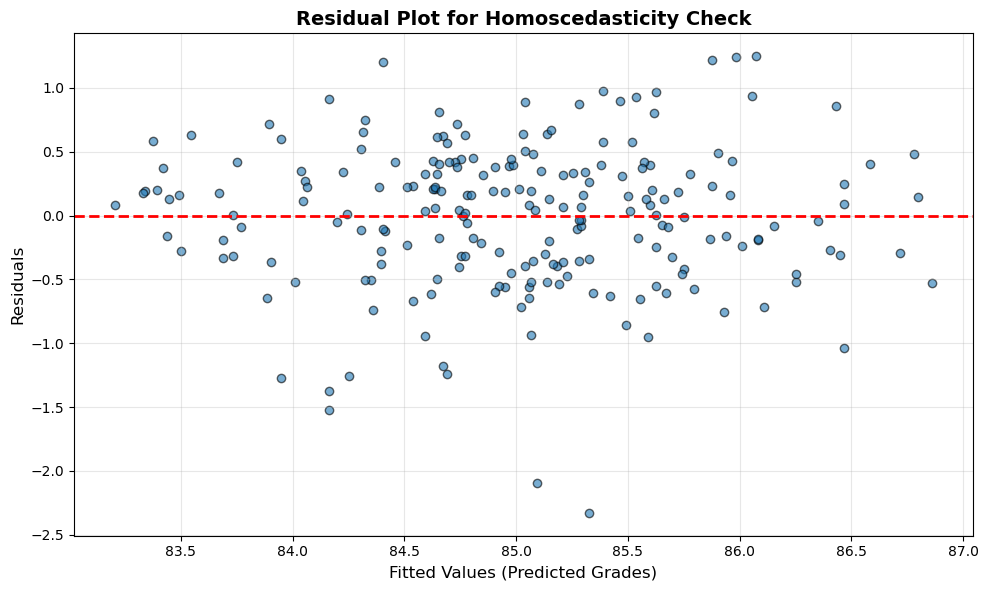

In [22]:
# Doing a homoscedasticity check with residual plots
# Independent variable (X): Review
# Dependent variable (y): Grades
X = df['Review']
y = df['Grades']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Predicted values
y_pred = slope * X + intercept

# Calculate residuals
residuals = y - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predicted Grades)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot for Homoscedasticity Check', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Choose the appropriate correlation analysis  given the assumption check.

In [23]:
# Option C: Pearson Correlation
# Calculate Pearson correlation for population
pearson_corr, pearson_p = stats.pearsonr(df['Review'], df['Grades'])

print(f"Pearson correlation coefficient: {pearson_corr:.4f}")
print(f"p-value: {pearson_p:.4f}")

Pearson correlation coefficient: 0.8101
p-value: 0.0000


## Provide and interpretation of the correlation analysis given that this is Population Data.

Since this is population data (not a sample), the correlation coefficient represents the true correlation between Reviews and Grades in the entire population. The p-value indicates whether this correlation is statistically significant, helping determine if the relationship is meaningful rather than due to chance.